# Model Evaluation

**Model evaluation** is the process of assessing how well a machine learning model performs on unseen data. It ensures the model generalizes well and avoids issues like overfitting (memorizing data) or underfitting (failing to learn patterns).

## Key Concepts:
- **Training Data**: Used to train the model.
- **Testing Data**: Used to evaluate the model on unseen examples.
- **Overfitting**: When the model performs well on training data but poorly on testing data.
- **Underfitting**: When the model performs poorly on both training and testing data.

## Common Metrics:
- **Classification**: Accuracy, Precision, Recall, F1 Score, and AUC-ROC.
- **Regression**: MAE, MSE, RMSE, and R².

## Why Evaluate?
Model evaluation ensures the model is reliable, identifies areas for improvement, and helps select the best-performing model for deployment.


# Build and Evaluate the Logistic Regression Model

In this section, we will:
1. **Build the Model**: Train a Logistic Regression model using the training dataset.
2. **Make Predictions**: Use the trained model to predict outcomes on the test dataset.
3. **Evaluate the Model**: Assess the model's performance using key metrics such as:
   - Accuracy
   - Confusion Matrix
   - ROC-AUC Curve

# Import Libraries
In this section, we import the required library:
- **pandas**: A powerful Python library used for data manipulation and analysis. It provides data structures such as DataFrames to work with tabular data easily.


In [ ]:
# Import Libraries
import pandas as pd

# Read the Data and Create a Copy

In this section:
1. **Read the Data**:
   - The dataset is loaded from a CSV file named `01Exercise1.csv` using `pd.read_csv()`.
   - It is stored in a DataFrame named `LoanData`.

2. **Create a Copy**:
   - A copy of the original dataset is created and stored in `LoanPrep`.
   - This ensures the original data (`LoanData`) remains unchanged during data preprocessing and analysis.

3. **Preview the Data**:
   - The `.head()` method is used to display the first few rows of the dataset, giving an overview of the structure and contents of the data.


In [ ]:
# Read the data and Create a copy
LoanData = pd.read_csv("01Exercise1.csv")
LoanPrep = LoanData.copy()

In [ ]:
LoanPrep.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


# Find Columns with Missing Values

In this section, we identify columns with missing values in the dataset:
- **`LoanPrep.isnull()`**: Checks each cell in the DataFrame for missing values (`NaN`), returning `True` for missing values and `False` otherwise.
- **`.sum(axis=0)`**: Calculates the total number of missing values for each column by summing up the `True` values along the vertical axis (columns).

This helps in understanding which columns require data cleaning or handling for missing values.


In [ ]:
#find out columns with missing values
LoanPrep.isnull().sum(axis=0)

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

# Replace Missing Values by Dropping Rows

Missing values are handled by removing rows that contain any `NaN` values:
- **`LoanPrep.dropna()`** removes rows with missing values from the DataFrame.
- The updated DataFrame (`LoanPrep`) will only include rows with complete data.

This method is effective when the dataset is large, and the dropped rows do not significantly affect the analysis.


In [ ]:
# Replace Missing Values. Drop the rows.
LoanPrep = LoanPrep.dropna()

# Check for Missing Values in Each Column

The code `LoanPrep.isnull().sum(axis=0)` is used to identify the number of missing values in each column:
- **`isnull()`**: Checks for missing values (`NaN`) and returns a boolean DataFrame.
- **`sum(axis=0)`**: Sums up the `True` values (representing missing data) column-wise.

This provides a clear view of which columns have missing values and how many, enabling informed data cleaning decisions.


In [ ]:
LoanPrep.isnull().sum(axis=0)

gender     0
married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

# Drop Irrelevant Columns

Certain columns may not add value to the analysis or model based on business understanding.
The code:
- **`LoanPrep.drop(['gender'], axis=1)`** removes the column `gender` from the DataFrame.
- **`axis=1`** specifies that the operation is column-wise.

This step simplifies the dataset by excluding irrelevant or redundant information.


In [ ]:
# Drop irrelevant columns based on business sense
LoanPrep = LoanPrep.drop(['gender'], axis=1)

In [ ]:
LoanPrep.columns

Index(['ch', 'income', 'loanamt', 'married_Yes', 'status_Y'], dtype='object')

# Create Dummy Variables
1. **Check Data Types**: The `.dtypes` method displays the data types of each column.
2. **Encode Categorical Variables**: The `pd.get_dummies()` function converts categorical variables into dummy/indicator variables, with the `drop_first=True` parameter dropping the first category to avoid multicollinearity.


In [ ]:
# Create Dummy variables
LoanPrep.dtypes
LoanPrep = pd.get_dummies(LoanPrep, drop_first=True)

In [ ]:
LoanPrep.head()

,ch,income,loanamt,married_Yes,status_Y
1,1.0,4583,128.0,True,False
2,1.0,3000,66.0,True,True
3,1.0,2583,120.0,True,True
4,1.0,6000,141.0,False,True
5,1.0,5417,267.0,True,True


# Normalize Data
1. **StandardScaler**: This scales the `income` and `loanamt` columns to have a mean of 0 and a standard deviation of 1.
2. Normalization ensures that numerical features are on the same scale, improving model performance.


In [ ]:
# Normalize the data (Income and Loan Amount) Using StandardScaler
from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()
LoanPrep['income'] = scalar_.fit_transform(LoanPrep[['income']])
LoanPrep['loanamt'] = scalar_.fit_transform(LoanPrep[['loanamt']])

In [ ]:
LoanPrep.head()

,ch,income,loanamt,married_Yes,status_Y
1,1.0,-0.128073,-0.194250,True,False
2,1.0,-0.392077,-0.971015,True,True
3,1.0,-0.461621,-0.294478,True,True
4,1.0,0.108246,-0.031380,False,True
5,1.0,0.011017,1.547205,True,True



# Split Data into Features and Labels
1. `Y`: Contains the dependent variable (`status_Y`) as the target.
2. `X`: Contains the independent variables after removing `status_Y`.


In [ ]:
# Create the X (Independent) and Y (Dependent) dataframes
# -------------------------------------------------------
Y = LoanPrep[['status_Y']]
X = LoanPrep.drop(['status_Y'], axis=1)

# Train-Test Split
1. Splits the data into training (70%) and testing (30%) sets.
2. **`stratify=Y`** ensures the split maintains the class distribution in `Y`.
3. **`random_state=1234`** ensures reproducibility.


In [ ]:
# Split the X and Y dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size = 0.3, random_state = 1234, stratify=Y)

# Build Logistic Regression Model
1. A Logistic Regression model is initialized using `LogisticRegression()`.
2. The model is trained on the training dataset (`X_train`, `Y_train`) using the `.fit()` method.


In [ ]:
# Build the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# Make Predictions
Uses the trained Logistic Regression model to predict outcomes for the test dataset (`X_test`).


# Predict the Outcome Using Test Data

The trained Logistic Regression model is used to make predictions on the test dataset:
- **`lr.predict(X_test)`**: Uses the `predict()` method of the model to generate predictions for the test dataset (`X_test`).
- The predicted outcomes are stored in `Y_predict`.

These predictions are later compared with the actual values (`Y_test`) to evaluate the model's performance.


In [ ]:
# Predict the outcome using Test data
Y_predict = lr.predict(X_test)

# Import Libraries to Evaluate the Model

The following libraries from `sklearn.metrics` are imported to evaluate the performance of the Logistic Regression model:
1. **`confusion_matrix`**: Computes the confusion matrix, showing true positives, true negatives, false positives, and false negatives.
2. **`classification_report`**: Generates a detailed performance report including precision, recall, F1 score, and support for each class.
3. **`accuracy_score`**: Calculates the accuracy of the model, defined as the ratio of correctly predicted observations to the total observations.

These tools provide a comprehensive evaluation of the model's effectiveness.


In [ ]:
# import libraries to evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Build Confusion Matrix, Score, and Report for the Default Model

In this step, we evaluate the Logistic Regression model's performance using the following:

1. **Confusion Matrix (`cm1`)**:
   - **`confusion_matrix(Y_test, Y_predict)`** computes a matrix summarizing the classification performance.
   - It provides counts of:
     - **True Positives (TP)**: Correctly predicted positives.
     - **True Negatives (TN)**: Correctly predicted negatives.
     - **False Positives (FP)**: Incorrectly predicted as positive.
     - **False Negatives (FN)**: Incorrectly predicted as negative.

2. **Accuracy Score (`score1`)**:
   - **`lr.score(X_test, Y_test)`** calculates the proportion of correctly predicted observations out of the total observations in the test dataset.

3. **Classification Report (`cr1`)**:
   - **`classification_report(Y_test, Y_predict)`** generates a detailed report including:
     - **Precision**: Proportion of positive predictions that are correct.
     - **Recall**: Proportion of actual positives correctly identified.
     - **F1 Score**: Harmonic mean of precision and recall.
     - **Support**: The number of actual instances for each class.

These metrics together provide a comprehensive understanding of the model's classification performance.


In [ ]:
# Build Confusion Matrix, score and report for the default model
cm1 = confusion_matrix(Y_test, Y_predict)
score1 = lr.score(X_test, Y_test)
cr1 = classification_report(Y_test, Y_predict)

In [ ]:
cm1

array([[ 29,  20],
       [  2, 108]], dtype=int64)

In [ ]:
df= pd.DataFrame(cm1)
df

,0,1
0,29,20
1,2,108


In [ ]:
cr1

'              precision    recall  f1-score   support\n\n       False       0.94      0.59      0.72        49\n        True       0.84      0.98      0.91       110\n\n    accuracy                           0.86       159\n   macro avg       0.89      0.79      0.82       159\nweighted avg       0.87      0.86      0.85       159\n'

# Convert the Classification Report to a DataFrame

This code converts the classification report (originally a string) into a structured DataFrame for better visualization and analysis:
1. **`io.StringIO(cr1)`**:
   - Converts the string representation of the classification report (`cr1`) into a file-like object.
2. **`pd.read_fwf(cr1_io)`**:
   - Reads the fixed-width formatted string into a pandas DataFrame, making it easier to view and process the report programmatically.

The resulting DataFrame (`df`) contains the same metrics (precision, recall, F1 score, and support) but in a tabular format.


In [ ]:
import io
# Convert the classification report string to a DataFrame
cr1_io = io.StringIO(cr1)  # Convert the string into a file-like object
df = pd.read_fwf(cr1_io)  # Read the fixed-width formatted string into a DataFrame
df

,Unnamed: 0,precision,recall,f1-score,support
0,False,0.94,0.59,0.72,49
1,True,0.84,0.98,0.91,110
2,accuracy,NaN,NaN,0.86,159
3,macro avg,0.89,0.79,0.82,159
4,weighted avg,0.87,0.86,0.85,159


# Create Prediction Probability List

This code generates the probability predictions for each instance in the test dataset:
- **`lr.predict_proba(X_test)`**:
  - This method computes the probabilities for each class (e.g., 0 or 1) for all instances in `X_test`.
  - It returns a 2D array where each row corresponds to an instance and columns represent class probabilities.
- **`[:, 1]`**:
  - Extracts the probabilities for the positive class (label `1`).
- **`Y_prob`**:
  - Stores the probabilities for the positive class, which can be used to analyze performance at different thresholds or to plot an ROC curve.

This approach provides more granular insights into the model's confidence in its predictions.


In [ ]:
# Create prediction probability list
Y_prob = lr.predict_proba(X_test)[:, 1]

# Create New Predictions Based on a Custom Probability Threshold

This code adjusts the prediction logic to use a custom probability threshold for classifying instances:
1. **`threshold = 0.8`**:
   - Sets a higher threshold (default is typically 0.5) for classifying an instance as belonging to the positive class (`1`).

2. **`for` Loop**:
   - Iterates over the probabilities in `Y_prob`.
   - If the probability for an instance is greater than `0.8`, it is classified as `1` (positive class).
   - Otherwise, it is classified as `0` (negative class).

3. **`Y_new_pred`**:
   - Stores the new predictions based on the custom threshold.

This approach is useful for scenarios where the cost of false positives or false negatives is high, allowing you to fine-tune the model's behavior to prioritize one type of error over the other.


In [ ]:
# Create new predictions based on new probability threshold
Y_new_pred = []
threshold  = 0.8

for i in range(0, len(Y_prob)):
    if Y_prob[i] > threshold:
        Y_new_pred.append(1)
    else:
        Y_new_pred.append(0)

# Check the Effect of Probability Threshold on Predictions

This code evaluates how changing the probability threshold affects the model's predictions and performance metrics:
1. **Confusion Matrix (`cm2`)**:
   - **`confusion_matrix(Y_test, Y_new_pred)`**:
     - Computes the confusion matrix using the new predictions (`Y_new_pred`).
     - Displays the distribution of true positives, true negatives, false positives, and false negatives based on the updated threshold.

2. **Accuracy Score (`score2`)**:
   - **`accuracy_score(Y_test, Y_new_pred)`**:
     - Calculates the proportion of correctly predicted observations out of the total observations with the new threshold.

3. **Classification Report (`cr2`)**:
   - **`classification_report(Y_test, Y_new_pred)`**:
     - Generates a detailed report of precision, recall, F1 score, and support for each class using the updated predictions.

This step allows you to analyze how changing the threshold affects the balance between precision, recall, and overall accuracy.


In [ ]:
# Check the effect of probability threshold on predictions
cm2 = confusion_matrix(Y_test, Y_new_pred)
score2 = accuracy_score(Y_test, Y_new_pred)
cr2 = classification_report(Y_test, Y_new_pred)

In [ ]:
cm2

array([[46,  3],
       [60, 50]], dtype=int64)

In [ ]:
df= pd.DataFrame(cm2)
df

,0,1
0,46,3
1,60,50


# Convert the Updated Classification Report to a DataFrame

This code converts the updated classification report (`cr2`) into a pandas DataFrame for better visualization and analysis:
1. **`io.StringIO(cr2)`**:
   - Converts the string representation of the updated classification report (`cr2`) into a file-like object.
2. **`pd.read_fwf(cr2_io)`**:
   - Reads the fixed-width formatted string into a pandas DataFrame.

The resulting DataFrame (`df`) presents the updated metrics (precision, recall, F1 score, and support) in a tabular format, making it easier to analyze and compare with the previous results.


In [ ]:
import io
# Convert the classification report string to a DataFrame
cr2_io = io.StringIO(cr2)  # Convert the string into a file-like object
df = pd.read_fwf(cr2_io)  # Read the fixed-width formatted string into a DataFrame
df

,Unnamed: 0,precision,recall,f1-score,support
0,False,0.43,0.94,0.59,49
1,True,0.94,0.45,0.61,110
2,accuracy,NaN,NaN,0.60,159
3,macro avg,0.69,0.70,0.60,159
4,weighted avg,0.79,0.60,0.61,159


ROC plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.

# Understand and Implement AUC ROC Curve

In this step, we import the necessary functions to evaluate the model using the AUC-ROC curve:
1. **`roc_curve`**:
   - Computes the Receiver Operating Characteristic (ROC) curve by calculating the True Positive Rate (TPR) and False Positive Rate (FPR) at various thresholds.
   - The ROC curve visually represents the trade-off between sensitivity (recall) and specificity.

2. **`roc_auc_score`**:
   - Calculates the Area Under the Curve (AUC) for the ROC curve.
   - The AUC is a single scalar value that quantifies the model's ability to distinguish between positive and negative classes.
   - A value of `1.0` indicates perfect classification, while `0.5` suggests no discrimination (random guessing).

These tools help evaluate the model's performance across different thresholds.


In [ ]:
# Understand and implement AUC ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get the Area Under the ROC Curve (AUC)

The code calculates the **Area Under the Curve (AUC)** for the Receiver Operating Characteristic (ROC) curve:
- **`roc_auc_score(Y_test, Y_prob)`**:
  - Computes the AUC using the actual labels (`Y_test`) and the predicted probabilities for the positive class (`Y_prob`).
  - The AUC quantifies the model's ability to distinguish between positive and negative classes.
  - A higher AUC value (close to `1.0`) indicates better model performance, while a value of `0.5` suggests random guessing.

The AUC provides a single metric to evaluate the model's performance across all possible classification thresholds.


In [ ]:
# Get the Area Under the ROC Curve
auc = roc_auc_score(Y_test, Y_prob)

# Plot the ROC Curve

The code generates and visualizes the **Receiver Operating Characteristic (ROC)** curve to evaluate the model's classification performance:

1. **Calculate ROC Components**:
   - **`roc_curve(Y_test, Y_prob)`**:
     - Computes the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds based on the actual labels (`Y_test`) and predicted probabilities (`Y_prob`).

2. **Plot the ROC Curve**:
   - **`plt.plot(fpr, tpr, linewidth=4)`**:
     - Plots the TPR (sensitivity) against the FPR at different classification thresholds.
   - **`plt.xlabel("False Positive rate")`**: Labels the x-axis as the False Positive Rate.
   - **`plt.ylabel("True Positive Rate")`**: Labels the y-axis as the True Positive Rate.
   - **`plt.title("ROC Curve for Loan Prediction")`**: Sets the title of the plot.

3. **Grid**:
   - **`plt.grid()`**: Adds a grid to the plot for better readability.

### Interpretation:
- The ROC curve shows the trade-off between sensitivity (TPR) and specificity (1 - FPR) at various thresholds.
- A curve closer to the top-left corner indicates better model performance.


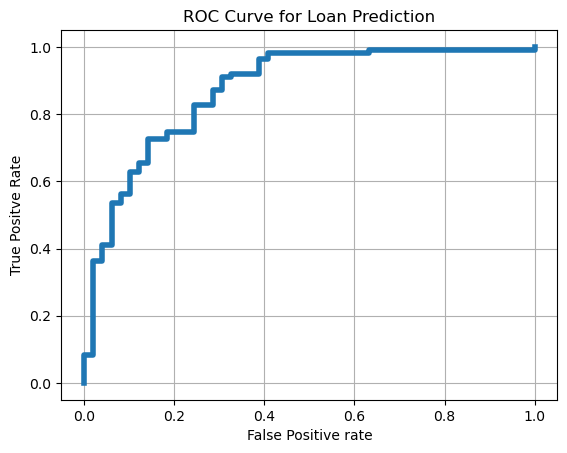

In [ ]:
# plot ROC
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(Y_test, Y_prob)
plt.plot(fpr, tpr, linewidth=4)
plt.xlabel("False Positive rate")
plt.ylabel("True Positve Rate")
plt.title("ROC Curve for Loan Prediction")
plt.grid()